<a href="https://colab.research.google.com/github/VijayaBhargavi198/5731Assignments/blob/master/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 10/21/2020)**

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/



In [ ]:
!pip install spacy-langdetect
!pip install language-detector
!pip install symspellpy
!pip install sentence-transformers
!pip install pysbd
!pip install pyLDAvis

In [62]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
# Gensim imports
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pandas as pd
df=pd.read_csv("/content/sample_data/MachineLearning.csv")
df.head(5)

,Titles
0,Machine learning
1,Introduction to machine learning
2,Scikit-learn: Machine learning in Python
3,Pattern recognition and machine learning
4,Genetic algorithms and machine learning


In [81]:
df["Titles"]

0                                      machine learning
1                      introduction to machine learning
2              scikit-learn: machine learning in python
3              pattern recognition and machine learning
4               genetic algorithms and machine learning
                            ...                        
95    ensemble machine learning: methods and applica...
96    how the machine 'thinks': understanding opacit...
97    convolutional lstm network: a machine learning...
98    machine learning classifiers and fmri: a tutor...
99    flow clustering using machine learning techniques
Name: Titles, Length: 100, dtype: object

In [103]:
#PREPROCESSING
#changing the whole list into smallercase
df["Titles"] = df["Titles"].str.lower()
#converting the dataframe to list
data = df["Titles"].values.tolist()
#Remove new line character
data = [re.sub(' $','',sent) for sent in data]
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
#Remove single quotes
data = [re.sub('\s+',' ',sent) for sent in data]
#Remove colons
data = [re.sub(':','',sent) for sent in data]
#Remove hipens fron hipenated words
data = [re.sub('-','',sent) for sent in data]
print(data[:2])

['machine learning', 'introduction to machine learning']


In [121]:
import nltk; 
nltk.download('stopwords')
# list for tokenized documents in loop
texts = []

# loop through document list
for i in data:
    
    # tokenize document string
    tokens = tokenizer.tokenize(i)

    # remove stop words from tokens
    stop_words = set(stopwords.words('english')) 
    stopped_tokens = [i for i in tokens if not i in stop_words]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
texts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['machin', 'learn'],
 ['introduct', 'machin', 'learn'],
 ['scikitlearn', 'machin', 'learn', 'python'],
 ['pattern', 'recognit', 'machin', 'learn'],
 ['genet', 'algorithm', 'machin', 'learn'],
 ['quantum', 'machin', 'learn'],
 ['machin', 'learn', 'action'],
 ['foundat', 'machin', 'learn'],
 ['gaussian', 'process', 'machin', 'learn'],
 ['machin', 'learn', 'probabilist', 'perspect'],
 ['weka', 'machin', 'learn', 'workbench'],
 ['uci', 'machin', 'learn', 'repositori'],
 ['dlibml', 'machin', 'learn', 'toolkit'],
 ['machinelearn', 'research'],
 ['ensembl', 'method', 'machin', 'learn'],
 ['machin', 'learn', 'trend', 'perspect', 'prospect'],
 ['machin', 'learn', 'autom', 'text', 'categor'],
 ['c4', '5', 'program', 'machin', 'learn'],
 ['select', 'relev', 'featur', 'exampl', 'machin', 'learn'],
 ['bioinformat', 'machin', 'learn', 'approach'],
 ['machin', 'learn', 'algorithm', 'perspect'],
 ['data',
  'mine',
  'practic',
  'machin',
  'learn',
  'tool',
  'techniqu',
  'java',
  'implement'],


In [122]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(texts, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[texts], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[texts[10]]])

['weka', 'machin', 'learn', 'workbench']


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [123]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
# Form Bigrams
data_words_bigrams = make_bigrams(texts)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:10])

[['learn'], ['learn'], ['learn'], ['learn'], ['learn'], ['learn'], ['learn', 'action'], ['learn'], ['process', 'learn'], ['learn', 'probabilist', 'perspect']]


In [124]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1)]]


In [118]:
id2word[0]

'learn'

In [125]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:20]]

[[('learn', 1)],
 [('learn', 1)],
 [('learn', 1)],
 [('learn', 1)],
 [('learn', 1)],
 [('learn', 1)],
 [('learn', 1), ('action', 1)],
 [('learn', 1)],
 [('learn', 1), ('process', 1)],
 [('learn', 1), ('perspect', 1), ('probabilist', 1)],
 [('learn', 1)],
 [('learn', 1), ('repositori', 1)],
 [('learn', 1), ('toolkit', 1)],
 [],
 [('learn', 1)],
 [('learn', 1), ('perspect', 1), ('prospect', 1), ('trend', 1)],
 [('learn', 1), ('categor', 1), ('text', 1)],
 [('learn', 1), ('machin', 1), ('program', 1)],
 [('learn', 1)],
 [('learn', 1), ('approach', 1)]]

In [130]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [131]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.114*"health" + 0.114*"address" + 0.114*"care" + 0.114*"implement" + '
  '0.113*"learn" + 0.005*"survey" + 0.005*"mine" + 0.005*"read" + '
  '0.005*"output" + 0.005*"space"'),
 (1,
  '0.260*"learn" + 0.112*"perspect" + 0.075*"structur" + 0.039*"vector" + '
  '0.039*"element" + 0.039*"monitor" + 0.039*"health" + 0.039*"support" + '
  '0.039*"interdepend" + 0.039*"output"'),
 (2,
  '0.658*"learn" + 0.037*"process" + 0.025*"use" + 0.013*"largescal" + '
  '0.013*"probabilist" + 0.013*"spark" + 0.013*"descent" + 0.013*"gradient" + '
  '0.013*"stochast" + 0.013*"understand"'),
 (3,
  '0.238*"learn" + 0.130*"model" + 0.130*"largescal" + 0.121*"system" + '
  '0.067*"user" + 0.067*"distribut" + 0.003*"optim" + 0.003*"space" + '
  '0.003*"structur" + 0.003*"output"'),
 (4,
  '0.128*"trend" + 0.128*"perspect" + 0.128*"prospect" + 0.127*"learn" + '
  '0.007*"approach" + 0.006*"survey" + 0.006*"interdepend" + 0.006*"output" + '
  '0.006*"space" + 0.006*"structur"'),
 (5,
  '0.012*"mine" + 

In [132]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.761201718955168

Coherence Score:  0.6607608518024175


In [134]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 1.7MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [135]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/Program Files/Java/jdk-14"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.8" 2020-07-14
OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [141]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [142]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('learn', 0.5294117647058824),
   ('categor', 0.058823529411764705),
   ('mine', 0.058823529411764705),
   ('gradient', 0.058823529411764705),
   ('element', 0.058823529411764705),
   ('survey', 0.058823529411764705),
   ('stochast', 0.058823529411764705),
   ('prospect', 0.058823529411764705),
   ('phase', 0.058823529411764705),
   ('thing', 0.0)]),
 (1,
  [('learn', 0.5238095238095238),
   ('detect', 0.14285714285714285),
   ('corner', 0.047619047619047616),
   ('distribut', 0.047619047619047616),
   ('cluster', 0.047619047619047616),
   ('applic', 0.047619047619047616),
   ('vector', 0.047619047619047616),
   ('faster', 0.047619047619047616),
   ('checker', 0.047619047619047616),
   ('interdepend', 0.0)]),
 (2,
  [('learn', 0.5),
   ('approach', 0.22727272727272727),
   ('datum', 0.13636363636363635),
   ('address', 0.045454545454545456),
   ('appli', 0.045454545454545456),
   ('system', 0.045454545454545456),
   ('structur', 0.0),
   ('space', 0.0),
   ('interdepend', 0.0),

In [146]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


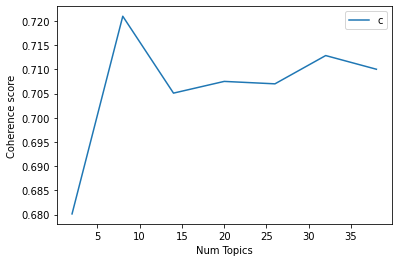

In [165]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [155]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [156]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [157]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [158]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [168]:
number_of_topics=7
words=10
model=create_gensim_lsa_model(texts,number_of_topics,words)

[(0, '-0.985*"learn" + -0.054*"system" + -0.053*"perspect" + -0.053*"approach" + -0.044*"machin" + -0.041*"use" + -0.032*"datum" + -0.032*"health" + -0.032*"largescal" + -0.031*"detect"'), (1, '-0.474*"machin" + -0.465*"system" + 0.289*"approach" + -0.266*"datum" + -0.242*"largescal" + -0.239*"big" + -0.195*"medicin" + -0.164*"clinic" + -0.164*"predict" + 0.164*"detect"'), (2, '-0.416*"system" + 0.356*"health" + 0.266*"datum" + -0.256*"largescal" + 0.249*"care" + -0.248*"approach" + 0.237*"structur" + 0.225*"big" + 0.186*"support" + 0.186*"vector"'), (3, '-0.368*"approach" + -0.332*"datum" + 0.304*"perspect" + -0.284*"big" + -0.233*"medicin" + 0.226*"system" + -0.212*"detect" + 0.198*"structur" + 0.192*"vector" + 0.192*"support"'), (4, '0.411*"approach" + -0.307*"use" + 0.284*"structur" + 0.264*"vector" + 0.264*"support" + 0.245*"detect" + 0.228*"perspect" + 0.217*"corner" + 0.207*"system" + 0.188*"space"'), (5, '-0.576*"perspect" + 0.317*"vector" + 0.317*"support" + -0.315*"health" + 

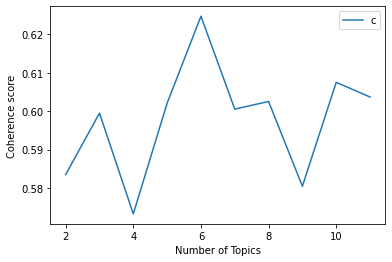

In [170]:
start,stop,step=2,12,1
plot_graph(texts,start,stop,step)

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic.In LDA the coherence score is higher than that of LSA,Higher coherence score for seen in LDA where it is found to be 0.720, where as for the same LSA gave a score of around 0.65.Thus i infere LDA to be better than LSA.